
## Name: Atte Kohonen
## Student_ID: 2101514

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1 

In [2]:
#Importing and combining the files

demographics = pd.read_csv('marketing_demographics.csv')
business = pd.read_csv('marketing_business.csv')

marketing = pd.merge(demographics,business, on = 'ID')
marketing.head()

,ID,Education,Marital_Status,Income,Country,Age,Children,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response
0,0,Graduation,Married,70951.0,SA,37,0,1198,16,3,13,0,1,0,0
1,1,Graduation,Single,57091.0,CA,61,0,577,17,7,10,1,5,0,1
2,9,Master,Single,46098.0,CA,47,2,120,7,3,4,0,8,0,0
3,13,PhD,Widow,25358.0,SA,75,1,32,4,1,3,0,6,0,0
4,17,PhD,Married,60491.0,SP,51,1,1028,24,6,18,0,5,0,0


**1.1 ) Calculate the average of ’Total Amount’ and ’Total Purchase’ for each Education category. 
Do you find the same category to have the highest average for both amount and purchase?**

In [3]:
marketing[['Total_Amount','Total_Purchase','Education']].groupby(by ='Education').mean()

#Out of the Education categories, only PhD has the highest avarage for both amount and purchase

,Total_Amount,Total_Purchase
Education,,
2n Cycle,494.930000,11.680000
Basic,81.796296,5.222222
Graduation,621.686380,12.695341
Master,609.767123,12.468493
PhD,676.733888,13.492723


**1.2 ) Filter your data for countries from which there is at least 200 customers. From which country in this
filtered dataset you can find the most complaints (column Complaint)?**

In [3]:
# Selecting the countries with at least 200 customers
filtered_data = marketing[marketing['Country'].map(marketing['Country'].value_counts()) >= 200]

#Grouping the countries with the amount of complaints
filtered_data[['Complaint','Country']].groupby(by='Country').value_counts()

#we can see that the country 'SP' has the most amount of complaints which is 14. 


Country  Complaint
CA       0             264
         1               2
SA       0             334
         1               3
SP       0            1079
         1              14
dtype: int64

**1.3 ) Calculate a new column that is 0, if the customer has 0 children, and 1 otherwise (so if the customer
has at least 1 child). Do customers with or without children have higher average Income? Check
whether the difference is statistically significant using a t-test!**

In [5]:
#Creating a new column for the customers with children
marketing['new_children_column'] = (marketing.Children >= 1).astype(int)

#Importing the library needed to perform a t-test
from scipy import stats

#selecting people with children and without children separately
with_children = marketing[marketing.new_children_column == 1].Income
without_children = marketing[marketing.new_children_column == 0].Income

#People without children have higher avarage income
print('The mean avarage income for people who HAVE children is:', with_children.mean())
print('Whereas the mean avarage income for people who DONT HAVE any children is:',without_children.mean())

#Using the t-test to compera the two mean values 
stats.ttest_ind(with_children,without_children)

#We can say based on the pvalue that the mean income value 
#for people with and without children is significantly different,
#When taking in consideration the level of 5% level of significance.


The mean avarage income for people who HAVE children is: 46865.6260265319
Whereas the mean avarage income for people who DONT HAVE any children is: 65705.56556082149


Ttest_indResult(statistic=-16.9071717250489, pvalue=2.08492231266765e-60)

**1.4 ) The company believes that their main target group is the customers aged between 18 and 45 years.
To check whether it is reflected in the sales, check whether the average number of Web Purchase is
higher for the customers in the target age group than for other customers. Do you have the same
result when you use Store Purchase? (Hint: you can create a new column that is 1 when the customer
is in the target age group and 0 otherwise).**

In [26]:

# Creating a new column for the target group.
marketing['target_group'] = ((18 <= marketing.Age) & (marketing.Age <= 45)).astype(int)   

# Selecting the customers within the target group and customers not belonging to the target group
# and checking their mean values for the web purchases. 
web_mean_target = marketing[marketing.target_group == 1].Web_Purchase.mean()
web_mean_not_target = marketing[marketing.target_group == 0].Web_Purchase.mean()

# We can see that the avarage number of webpurchases is lower for the target group.
print('The avarage number of web purchase for the target group is', web_mean_target)
print('and for the others', web_mean_not_target)

# Doing the same as above but this time for the store purchases.
Store_mean_target = marketing[marketing.target_group == 1].Store_Purchase.mean()
Store_mean_not_target = marketing[marketing.target_group == 0].Store_Purchase.mean()

# The avarage number of store purchases is also lower for the target group.
print('The avarage number of store purchases for the target group is', Store_mean_target)
print('and for the others', Store_mean_not_target)



The avarage number of web purchase for the target group is 3.525
and for the others 4.2933168316831685
The avarage number of store purchases for the target group is 7.6883333333333335
and for the others 8.762995049504951


**1.5 ) Calculate the correlation between the columns Total Purchase, Age, and Income. Which of the
other two variables seem to be more related to Total Purchase? Based on this and the previous
question, do you think it would be useful for the company to focus a lot of efforts on age-based
segmentation/marketing?**

In [42]:
#Checking the correlation between age and total purchase and income and total purchase. 
corr_Age = marketing['Total_Purchase'].corr(marketing['Age'])
corr_Income = marketing['Total_Purchase'].corr(marketing['Income'])

# We can see that person's income is a lot stronger correlated to total_purchases than age. 
print('The correlation between age and customers total purchases is', corr_Age)
print('and the correlation between the income and amount total purchases is', corr_Income)

# Based on the results of this question and 
# previous one I would suggest the company to concentrate less on the age-based segmentation/marketing.
# Since the mean number for web and store purchases is lower for the target group and income seems to have
# stronger correlation to the total purchases than age. 


The correlation between age and customers total purchases is 0.16539716660515677
and the correlation between the income and amount total purchases is 0.6257545333313767


# Exercise 2 - visualization of telecom churn dataset

### 2.1 ) Visualization

**Create 6 plots of your choice based on the data and explain what information you
gain from them; the plots can be histograms, boxplots etc. You need to create some univariate and
multivariate plots, and focus mainly on the ’Churn’ column. The created visuals should address at
least the following issues : (i) relationship between Churn and having international or voice mail plan
in the subscription; (ii) total minutes/calls/charge during different parts of the day and Churn (you
may also want to create a column that has these values for the whole day, i.e., the sum of day, eve
and night minutes/calls/charges); (iii) relationship between international calls/charge and Churn;
(iv) relationship between Customer service calls and Churn.**

In [2]:
# importing the dataset 
telecom = pd.read_csv('churn-bigml-80.csv')
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Plots 1 and 2. relationship between Churn and having international or voice mail plan in the subscription**

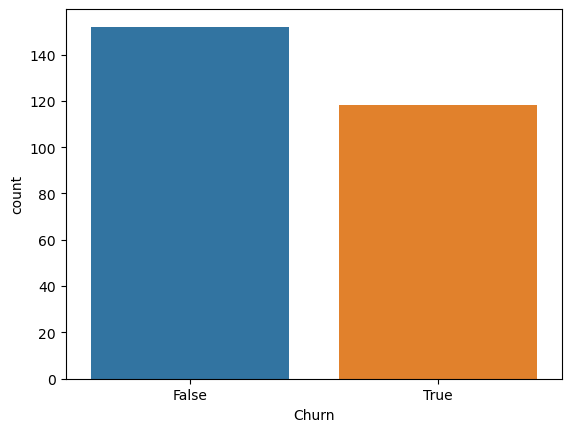

In [46]:
#Selecting the the customers with international and voice mail plans separately
int_plan = telecom[telecom['International plan'] == 'Yes']
voice_plan = telecom[telecom['Voice mail plan'] == 'Yes']

#Creating a countplot visualizing the amount of churns of the customers who had international plan in their subscription.
#We can see that almost half of the people who chose international plan cancelled their subscription.
international_plan_plot = sns.countplot(x=int_plan.Churn)

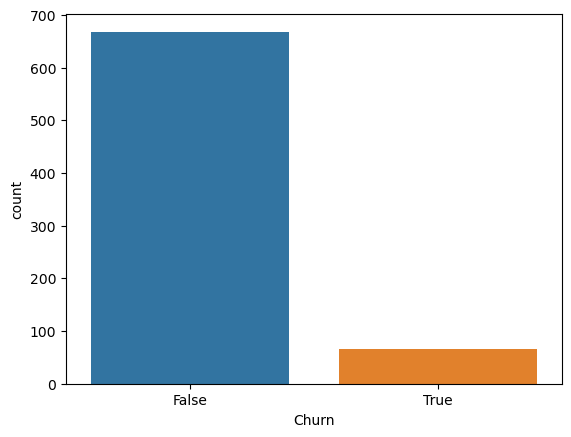

In [47]:
# In comparison to the voice plan customer group, we can see that there are sligthly less churns.
# However, the difference is quite drastic when compared to the total amount of subscriptions in 
# each group. In the voice mail group a great majority of the customers have kept their subscription,
# whereas in the international plan group, almost half of the customers canceled their subscription.
voice_plan_plot2 = sns.countplot(x=voice_plan.Churn)

**Plot 3. total minutes/calls/charge during different parts of the day and Churn (you may also want to create a column that has these values for the whole day, i.e., the sum of day, eve and night minutes/calls/charges).**

<AxesSubplot:xlabel='Churn', ylabel='All_costs'>

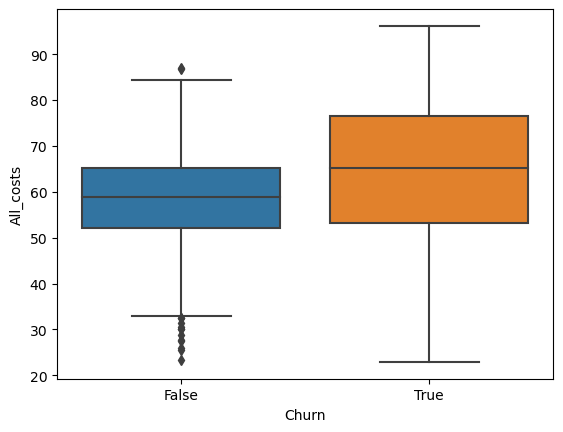

In [48]:
# How much does the total cost of the subscription affect on the churn? 
# Let's compare the total costs of the ones who kept their subscription and the ones who canceled.

# Creating a new column with all the costs combined
telecom['All_costs'] = telecom['Total day charge'] + telecom['Total eve charge'] + telecom['Total night charge'] + telecom['Total intl charge']

# Creating a boxplot to illustrate the relationship. 
sns.boxplot(x = 'Churn', y = 'All_costs', data = telecom, orient = 'v')

# We can see that the mean costs for the ones who kept their subscription is around 60 dollars. 
# For the ones who canceled their subscription, the median was around 65 dollars and top 25% who canceled
# their subscription were charged roughly 75 - 100 dollars. 
# Based on this, we can say that the total costs of the subscription does matter when it comes to churn.  

**Plot 4) relationship between international calls/charge and Churn.**

<AxesSubplot:xlabel='Total intl calls', ylabel='count'>

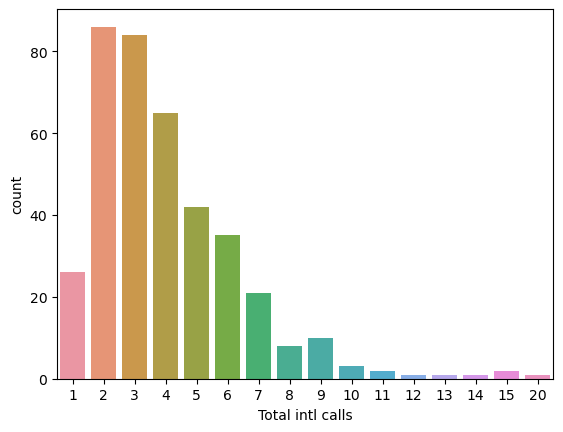

In [49]:
# A countplot illustrating the amount of international calls among the customers who canceled their subscription.

# Lets select all the customers who canceled their subscription
customers_churned = telecom[telecom['Churn'] == True]

# And then create a countplot with this data including the total amount international calls. 

sns.countplot( x = customers_churned['Total intl calls'])

# We can see that the mean is around 4 calls.

**Plot 5) relationship between Customer service calls and Churn.**

/Users/atte/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

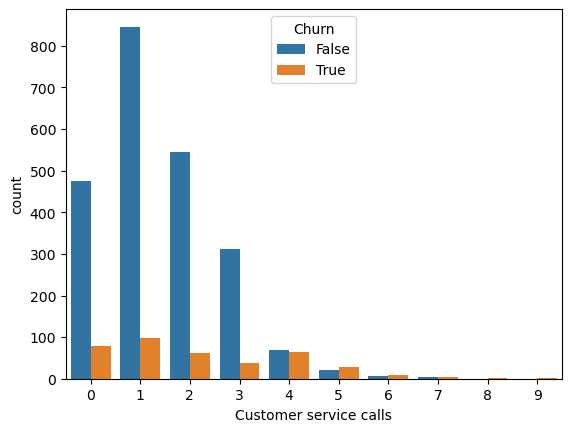

In [50]:
# Lets compare the amount of customer service calls between the ones who kept their subscription 
# and the ones who canceled. 

# Let's illustrate this with a countplot
sns.countplot(telecom['Customer service calls'],hue =telecom['Churn'])

# We can see that most of the customers have made atleast 1 call to the customer service.
# However, there is a significant amount of customers in both categories who did not make any calls.
# It is also interesting to see that there is almost an equal amount of people who made 4 calls in both categories.

**Plot 6) Relationship between the total amount calls and Churns 
and the mean number of calls within the ones who canceled their subscription.**


/Users/atte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_amount_calls', ylabel='Density'>

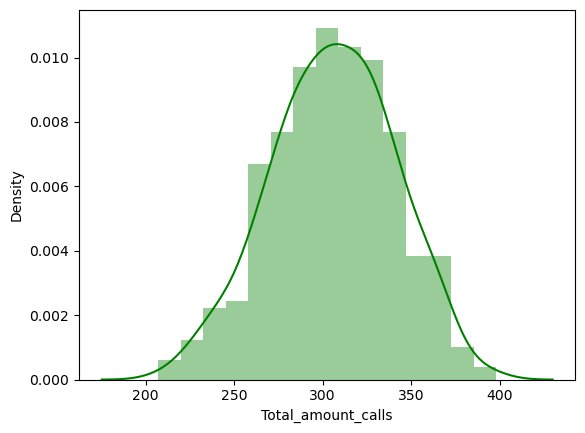

In [51]:

#Creating new columns that sums the amount of calls and minutes for each day.
telecom['Total_amount_calls'] = telecom['Total day calls']+telecom['Total eve calls']+telecom['Total night calls']+telecom['Total intl calls']
telecom['Total_amount_minutes'] = telecom['Total day minutes']+telecom['Total eve minutes']+telecom['Total night minutes']+telecom['Total intl minutes']

# Creating a distribution plot. We can see that the distribution follows quite well normal distribution
# The mean amount of calls is around 300. 
sns.distplot(telecom[telecom.Churn == True].Total_amount_calls, color = 'Green')



**Extra plot:
Percentages of the day and evening charges of both groups; people who kept and did not keep their subscription**



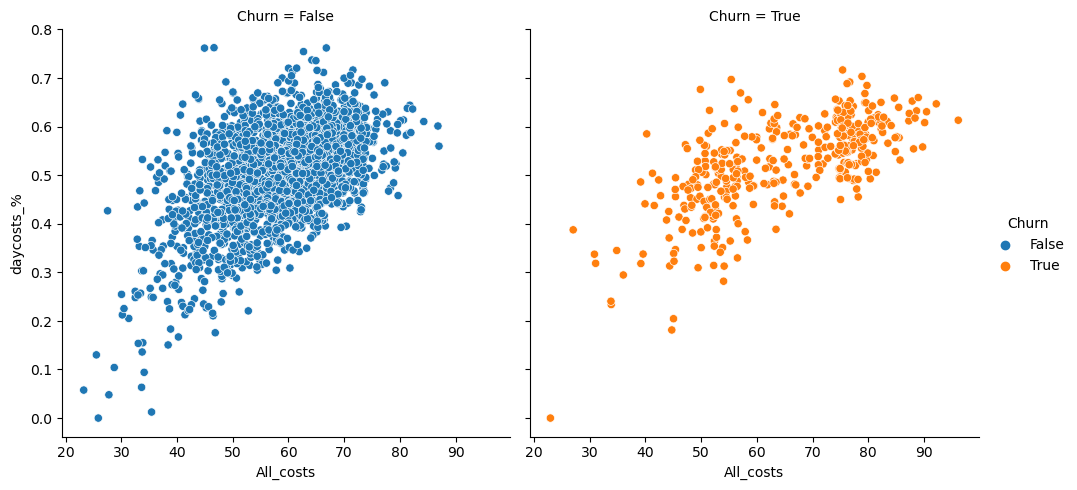

In [52]:
# Then let's create a new category for the daycost of the total bill. 

telecom['daycosts_%'] = telecom['Total day charge'] / telecom['All_costs']

# Let's visualize this with a scatter plot. 
sns.relplot(x = 'All_costs', y = 'daycosts_%', kind ='scatter', data = telecom, col ='Churn', hue = 'Churn')

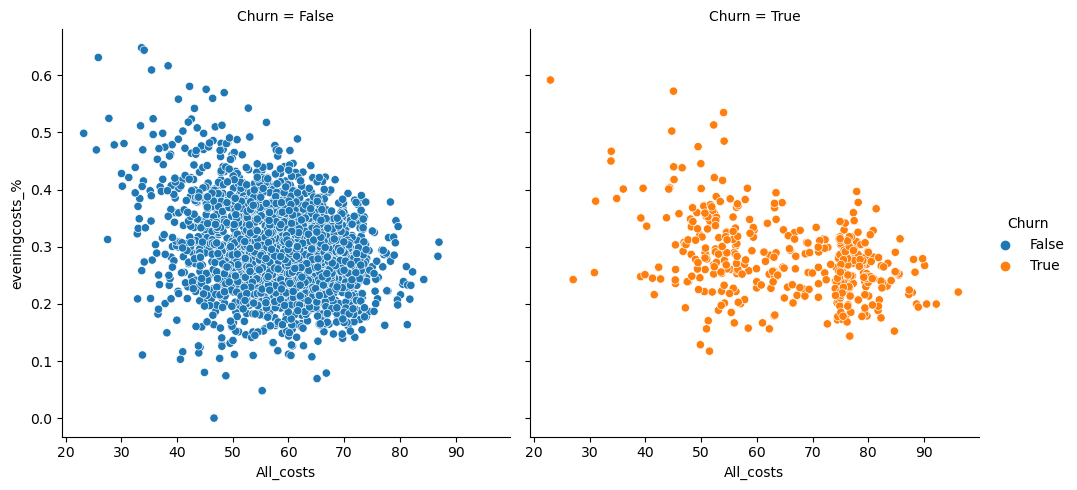

In [53]:
# Let's do the same as above but this time for the evenin charges. 
# For this we are also going to create a new category. 

telecom['eveningcosts_%'] = telecom['Total eve charge'] / telecom['All_costs']

# Again, let's visualize this with a scatter plot. 
sns.relplot(x = 'All_costs', y = 'eveningcosts_%', kind ='scatter', data = telecom, col ='Churn', hue = 'Churn')


In [55]:
# By comparing the scatter plots, we can see that the daily charges made a bigger percentage of the total costs in
# both groups. The mean the total charges for the ones who kept their subscription is around 60 dollars and aproximately
# 50% of the total bill were day charges.

# whereas for the ones who churned, we can see that there is more dispersion, as if there was two separate groups. 
# One with a mean  total charge of 50 dollars and aday charges consisting 50% of the total bill, and other one with mean of 80 dollars
# and 60% of the total bill. 

# When it comes to the evening costs the percentage was smaller in both groups in general, the great majority of
# these charges land between 20 - 40 % for both churned and non-churned customers.

### 2.2 ) Descriptive statistics
    

**You are free to explore the data with any of the tools we used in the course to 
    understand the relationship between Churn and other data available about customers. 
    You need to at least address the issues mentioned in the visual analysis part. 
    Note that, as ’Churn’ has two possible values, you want to use either cross-tabulation 
    (to compare with other categorical variables) or groupby and aggregation (to compare with numeric variables).**

**Example 1. Median total charge in top ten states by churn**

In [56]:
# Selecting the top ten states by churn
top_ten = telecom[telecom.Churn == True].State.value_counts()[:10]
top_ten

# Creating and empty list for the states and their mean charges
mean_charge = []

# iterating through the selected states and storing their names and mean values to the empty list.
for state in top_ten.index:
    mean_charge.append(state)
    mean_charge.append(telecom[telecom.State == state].All_costs.mean())
mean_charge 

# from the list we can see that there is not a huge difference in the mean charges in the top ten states by churn.
# MD and NJ states have slightly higher median charge. 

['TX',
 59.480181818181805,
 'MD',
 62.25433333333335,
 'NJ',
 63.04300000000003,
 'MN',
 59.6,
 'NV',
 59.619836065573764,
 'MI',
 59.755172413793105,
 'NY',
 58.03985294117646,
 'AR',
 58.860212765957456,
 'CT',
 58.739322033898304,
 'MS',
 58.112083333333324]

**Example 2. Sum of all the customer costs in different states. Only top four are chosen.**

In [57]:
# here I select the columns and group them by state and use sum function to get the sum of all the costs.
# which after I sort them by costs and select the top 4. 
telecom[['State', 'All_costs']].groupby('State').sum().sort_values('All_costs', ascending = False)[:4]

,All_costs
State,
WV,4989.99
MN,4172.00
VA,4038.59
OH,4034.94


**Example 3. relationship between Churn and having international or voice mail plan in the subscription**

In [58]:
# Looking how many of the customers who canceled their subscription had international plan or voice mail plan.
# Selecting the target group.
churned = telecom[telecom['Churn'] == True]

# There are 118 Customers who had International plan in the dataset
only_intplan = churned[(churned['International plan'] == 'Yes')]
only_intplan.shape[0]

#It turns out that there are no customers that would have just the voice plan in the selected dataset.
only_voicemail = churned[churned['Voice mail plan'] == 'yes']
only_voicemail.shape[0]



0

**Example 4. total charge during different parts of the day and Churn**

In [59]:
# We can check the correlation between total day charge and churn for each state 
# by using .grouby() and .corr() functions.

highest_corr = telecom[['Churn', 'Total day charge', 'State']].groupby(['State']).corr()

# We can see that the highest correlation between churn and total day charge exists in a state called "CT".
highest_corr[highest_corr['Total day charge'] < 1.0].sort_values(by = 'Total day charge', ascending = False)[:1]

,,Churn,Total day charge
State,,,
CT,Churn,1.0,0.513788


**Example 5. relationship between international calls/minutes/charge and Churn**

In [60]:
# Probably not the best example, but we could use a pivot table to find out what combination of Churn,
# Total international calls and minutes gives us the highest avarage for total intl charge. 
# Below we can see that the highest avarage international charge was 5.40 dollars. 
telecom.pivot_table(['Total intl charge'], index =['Churn','Total intl calls', 'Total intl minutes']).sort_values('Total intl charge',ascending = False)[:1]

,,,Total intl charge
Churn,Total intl calls,Total intl minutes,
True,6,20.0,5.4


**Example 6. relationship between Customer service calls and Churn.**

In [61]:
# We could find out the mean value of customer service calls for both churned and non-churned customers.

telecom[['Churn','Customer service calls']].groupby('Churn').mean()


,Customer service calls
Churn,
False,1.453029
True,2.206186


In [62]:
# or the sum of all the customer service calls in both groups
telecom[['Churn','Customer service calls']].groupby('Churn').sum()


,Customer service calls
Churn,
False,3310
True,856


In [63]:
#We can also create catogories based on the amount of customer service calls

#For this we create labels and bins

bins = [0,1,4,8,20]
labels = ['not problematic but annoying', 'potentially problematic', 'Problematic', 'Really problematic']

#and a new category 
telecom['Customer_service_call_category'] = pd.cut(telecom['Customer service calls'] , bins = bins, labels = labels)

#now we have categories that tells us to which category the customer belongs to 
#based on the amount of customer service calls 
#(with NaN values for the ones who never called to the customer service)

telecom[['Customer_service_call_category']]

,Customer_service_call_category
0,not problematic but annoying
1,not problematic but annoying
2,NaN
3,potentially problematic
4,potentially problematic
...,...
2661,potentially problematic
2662,potentially problematic
2663,potentially problematic
2664,potentially problematic


## Exercise 3 - Data preparation

In [64]:
# Importing data
happydata = pd.read_csv('happiness.csv',sep=";")
happydata.shape

(156, 9)

**3.1 ) Remove outliers: (i) for the column ’Healthy life expectancy’, remove the top 3% of values, and (ii) for column ’Perceptions of corruption’, remove the bottom 2%**

In [65]:
# Selecting the top 3% of the values
cut_life_expectancy = happydata['Healthy life expectancy'].quantile(0.97)

# and the bottom 2%
cut_corruption = happydata['Perceptions of corruption'].quantile(0.02)

# and then removing them.
new_happydata = happydata[(happydata['Healthy life expectancy'] < cut_life_expectancy) & (happydata['Perceptions of corruption'] > cut_corruption)]


**3.2 ) Handle missing values: (i) remove countries (rows) where there are 3 or more missing values; 
    (ii) fill in the rest of the missing values with the mean value of their column**

In [66]:
# Droping all the rows with 3 or more null values with the .dropna() function
new_happydata.dropna(thresh = 3)
# filling the rest of the  missing values with the .fillna() function. 
new_happydata.fillna(new_happydata.mean())


/var/folders/sj/_s6f_qd15ksg2yhp3j8wmh_r0000gn/T/ipykernel_4556/1334517293.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_happydata.fillna(new_happydata.mean())


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587000,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573000,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582000,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624000,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522000,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163000,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711000,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885000,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,1.202944,0.361,0.000,0.158,0.025


**3.3 ) Create a categorical version of ’GDP per capita’ column with four categories and corresponding labels (keep also the original column): (i) below 0.58, ’Low’, (ii) between 0.58 and 0.96, ’Average’, (iii) between 0.96 and 1.23, ’High’, and (iv) above 1.23, ’Very High’.**

In [67]:
#Creating the bins 
bins = [0,0.58,0.96,1.23,2]

# Creating the labels
labels = ['Low','Average','High','Very High']

#Creating a new column in which we store the categorical values based on the GDP
new_happydata['Categories for GDP per capita'] = pd.cut(happydata['GDP per capita'],bins = bins, labels = labels)
new_happydata.head()



/var/folders/sj/_s6f_qd15ksg2yhp3j8wmh_r0000gn/T/ipykernel_4556/1277784427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_happydata['Categories for GDP per capita'] = pd.cut(happydata['GDP per capita'],bins = bins, labels = labels)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Categories for GDP per capita
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Very High
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Very High
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Very High
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Very High
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Very High


**3.4 ) Scale all the numeric columns using the StandardScaler transformation.**

In [68]:
# importing the needed packages
from sklearn.preprocessing import StandardScaler

#Creating an instance
Standard = StandardScaler()

# Fitting and transforming the data
Standard.fit(happydata[['Overall rank','Score', 'GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])
happydata[['Overall rank','Score', 'GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']] = Standard.transform(happydata[['Overall rank','Score', 'GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])

new_happydata.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Categories for GDP per capita
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Very High
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Very High
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Very High
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Very High
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Very High
